# Objective: display an ECG according to standards

## 1.1.2. Download the file

In [3]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir("..")

data = "data/ECGu.txt"

### 1.2. Read the ECG file

In [4]:
import numpy as np 
import matplotlib.pyplot as plt

ecg = np.loadtxt(data)

In [12]:
print(ecg)

[[-275. -119. -119.]
 [-275. -119. -119.]
 [-275. -118. -121.]
 ...
 [  -4.  -83.   21.]
 [  -9.  -88.   31.]
 [ -16.  -96.   33.]]


## STEP 2 
- Display the contents of this file
- Display graphs of the file contents with the correct scale, labels,
and format.

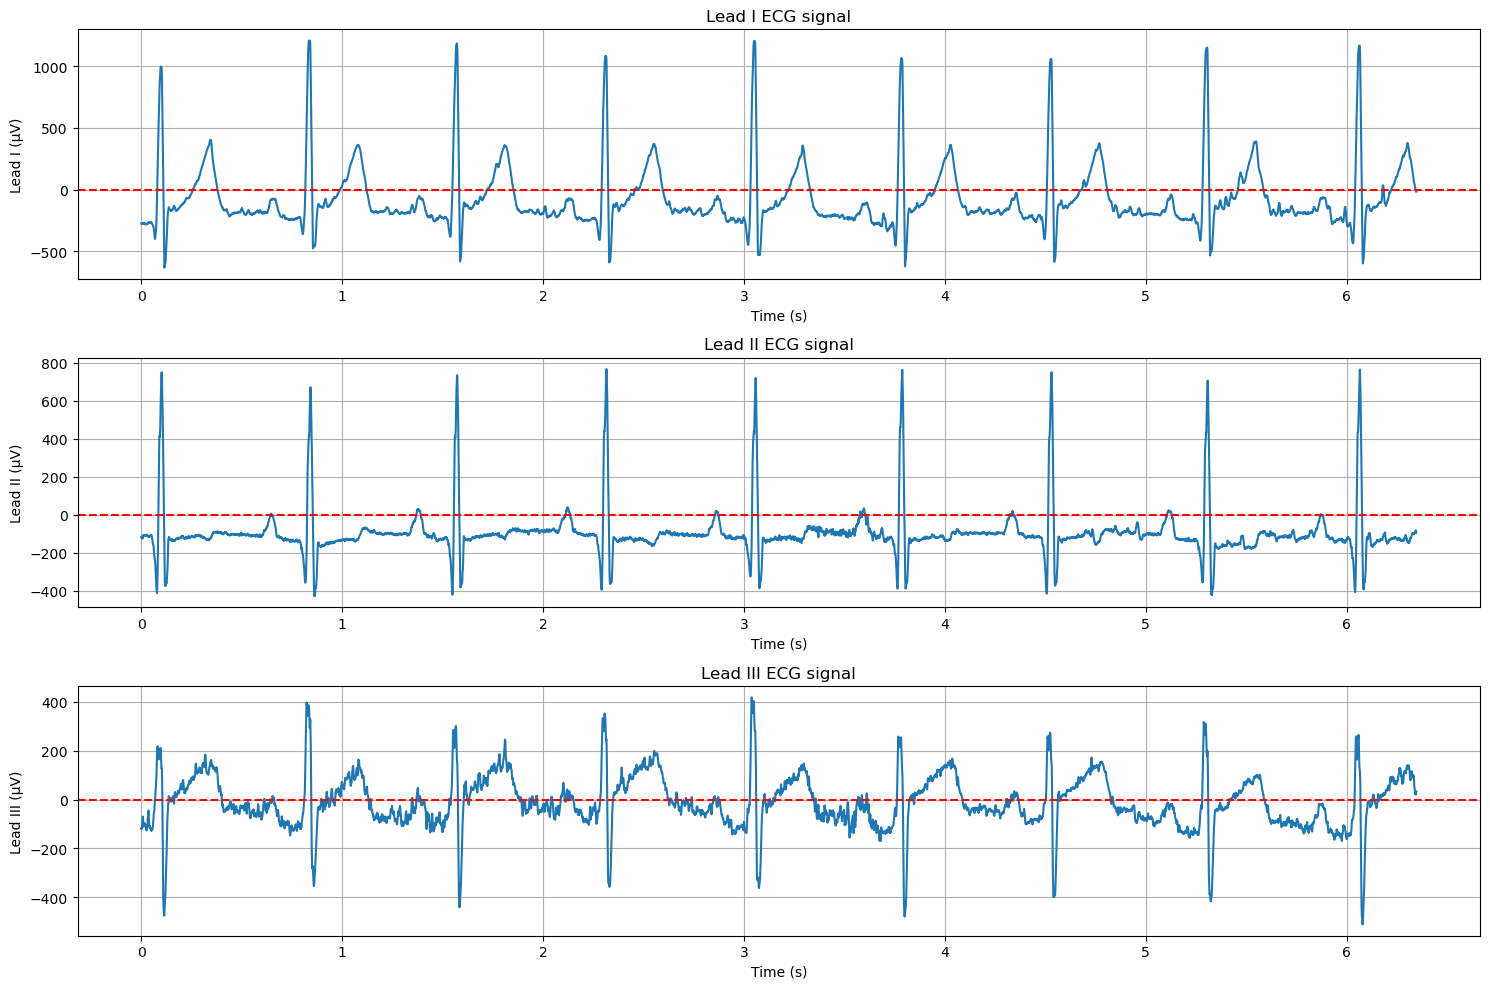

In [20]:
# settings
sampling_frequency = 1024  # Hz
gain = 520  # µV

# Create time axis (in seconds)
time = np.arange(len(ecg)) / sampling_frequency

# Create a figure with 3 subplots for each lead
plt.figure(figsize=(15, 10))

# Plot Lead I
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st subplot
plt.plot(time, ecg[:, 0])  
plt.axhline(0, color='red', linestyle='--') 
plt.title('Lead I ECG signal')
plt.xlabel('Time (s)')
plt.ylabel('Lead I (µV)')
plt.grid(True)

# Plot Lead II
plt.subplot(3, 1, 2)  
plt.plot(time, ecg[:, 1])  
plt.axhline(0, color='red', linestyle='--') 
plt.title('Lead II ECG signal')
plt.xlabel('Time (s)')
plt.ylabel('Lead II (µV)')
plt.grid(True)

# Plot Lead III
plt.subplot(3, 1, 3) 
plt.plot(time, ecg[:, 2])  
plt.axhline(0, color='red', linestyle='--') 
plt.title('Lead III ECG signal')
plt.xlabel('Time (s)')
plt.ylabel('Lead III (µV)')
plt.grid(True)

# Display the plots
plt.tight_layout()  
plt.show()


### Lead II is considered the most representative in ECG recordings because of its anatomical alignment with the heart's electrical axis.

###  Answer the following questions:
- Does this ECG look correctly scaled to you?
- Is this a normal ECG?

 ##### For me, this ECG appears to be incorrectly scaled, with amplitudes that seem too high and a baseline that should be closer to zero, potentially due to sensor calibration issues. However, the shape of the ECG looks normal, with clearly visible P waves, QRS complexes, and T waves, suggesting a sinus rhythm and normal cardiac electrical activity.

## I normalized the ECG signal between 0.35 and 1 to make the ECG more appropriately scaled. 

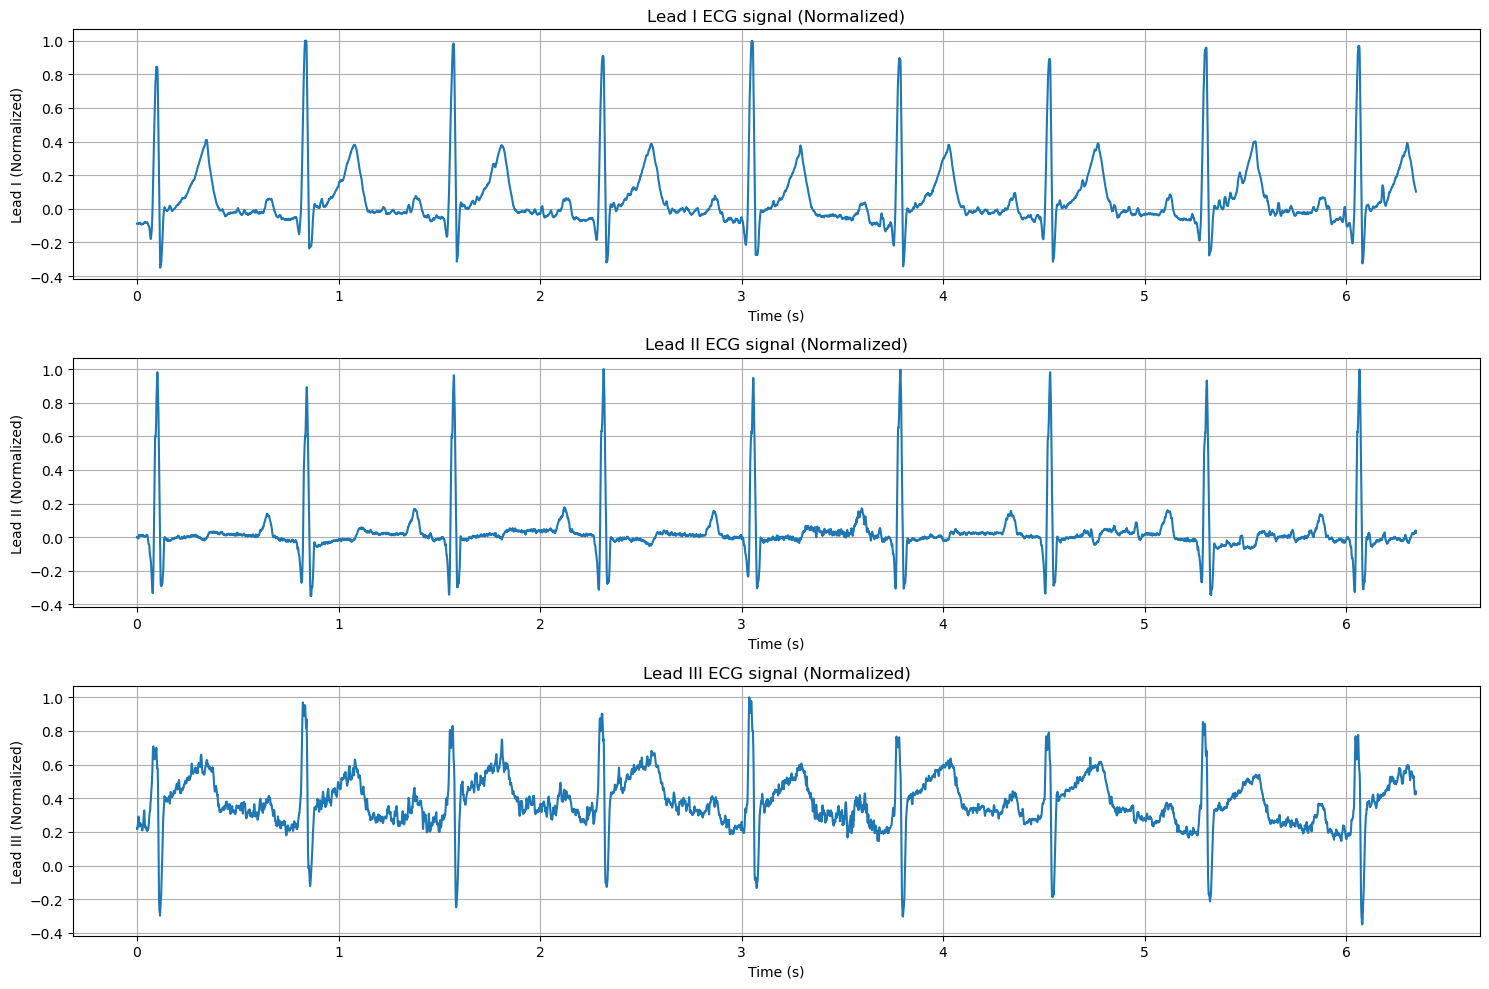

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Normalize ECG data
scaler = MinMaxScaler(feature_range=(-0.35, 1)) 
ecg_normalized = scaler.fit_transform(ecg)


plt.figure(figsize=(15, 10))


plt.subplot(3, 1, 1)
plt.plot(time, ecg_normalized[:, 0])  
plt.title('Lead I ECG signal (Normalized)')
plt.xlabel('Time (s)')
plt.ylabel('Lead I (Normalized)')
plt.grid(True)


plt.subplot(3, 1, 2)
plt.plot(time, ecg_normalized[:, 1])  
plt.title('Lead II ECG signal (Normalized)')
plt.xlabel('Time (s)')
plt.ylabel('Lead II (Normalized)')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(time, ecg_normalized[:, 2])  
plt.title('Lead III ECG signal (Normalized)')
plt.xlabel('Time (s)')
plt.ylabel('Lead III (Normalized)')
plt.grid(True)


plt.tight_layout()
plt.show()
